#<center>Bitcoin vs Ethereum</center>
<h3><center>Miguel Moreno (miguelmath.com)</center></h3>

<p align="justify">
<center>
<b>Abstract:</b> In this notebook we study the correlation between the values of Bitcoin and Ethereum during the year 2020, by market capitalization. We found that the values of 2020 resembles a linear
relation. We model this relation by a linear regression and test this model with the value of this
two cryptoassets of January 2021.
</center>
</p>


##Introduction
<p align="justify">
During the last years we have seen a raise on the popularity of Bitcoin and, as a consequence, a
raise on the value of Bitcoin, in July 2020 Bitcoin reached a value over the 10000 USD. Due to its
quick grow many people see Bitcoin as a bubble and as an unstable assets.
</p>
<p align="justify">
Many articles and news have been written about the high value of Bitcoin, but few were written about some other cryptoassets. Bitcoin is not the only cryptoassets with a high popularity
and growing rate. Ethereum is the second most popular cryptocurrency which has also gained
a lot of popularity in the recent years, this has been unnoticed by most of the people and mainstream news. It is natural to ask whether there is a relation between the values of the different
cryptocurrencies, in this notebook we study this question for Bitcoin and Ethereum during the
2020.
</p>

<p align="justify">
Cryptocurrencies are not the only cryptoassets, the introduction of Blockchain 2.0 allowed the
introduction of different kinds of Token which uses blockchains that already exist, such as the
Basic Attention Token from the browser Brave which uses the Ethereum blockchain. It is easy
to jump to the conclusion that a rise in the popularity of Ethereum would imply a rise on the
popularity of tokens based on the Ethereum blockchain. In this paper we study the question
whether an increase on the popularity of Ethereum implies an increase on the popularity of the
Basic Attention Token.
</p>
<p align="justify">
This notebook and the code used in it can be found in the github of the author. The pdf version
of this notebook can be found in the webpage of the author.
</p>

##Preliminaries
This is a notebook running in Google colab in which we will be using R for coding and we will use
the data from Yahoo finance. Therefore we have to activate the magic for R and obtain the data
from Yahoo. In this section we will activate R and install/activate the packages that we will use.

Activation of R magic

In [ ]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 26.4 MB/s 
  Created wheel for rpy2: filename=rpy2-3.5.1-cp37-cp37m-linux_x86_64.whl size=310565 sha256=b2bbbe37403081eff2386655379d0fc436ef72dc8fd518807a5e6f4029fb1e7d
  Stored in directory: /root/.cache/pip/wheels/65/df/9e/39aa22a3f47ec58751b5bf6907036fbc131d85b6d7cbd3b3fe
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [ ]:
%load_ext rpy2.ipython

Install and load the packages.

In [ ]:
%%R
install.packages('quantmod')
install.packages('dplyr')
install.packages('tidyverse')
install.packages('ggplot2')
install.packages('caTools')
library(quantmod)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(caTools)


	‘/tmp/RtmpZvlwKw/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpZvlwKw/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpZvlwKw/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpZvlwKw/downloaded_packages’

(as ‘lib’ is unspecified)














	‘/tmp/RtmpZvlwKw/downloaded_packages’



Attaching package: ‘zoo’



    as.Date, as.Date.numeric



  method            from
  as.zoo.data.frame zoo 

Attaching package: ‘dplyr’



    first, last



    filter, lag



    intersect, setdiff, setequal, union




── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   0.3.5
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.3     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks xts::last()


##Preparation and exploration of the data
<p align="justify">
In this section we proceed to obtain the data and do a basic exploration of it, to get a basic overview
of the values. We will use the data of Bitcoin, Ethereum, and the Basic Attention Token. For each
one we will download the data an plot the Japanese Candlesticks. We will work with the adjusted
value.
</p>

<p align="justify">
We will study the time interval of 2020, from 1st of January to the 31st of December. We have
to define the interval so we can proceed with the downloading of the data.
</p>

In [ ]:
%%R
starting_date <- "2020-1-1"
final_date <- "2022-10-31"

###Bitcoin

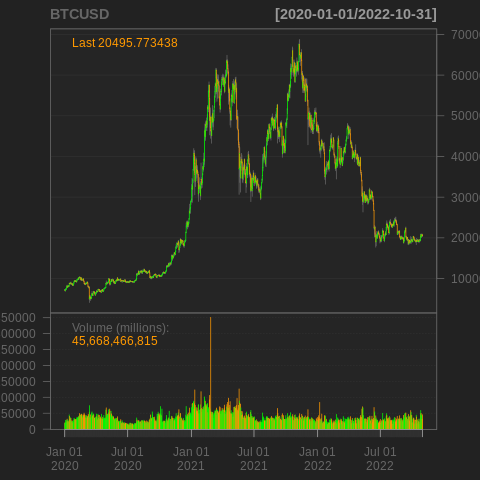

In [ ]:
%%R
BTCUSD <- getSymbols.yahoo("BTC-USD", from = starting_date, to = final_date, auto.assign = F)[,]
BTCAdjust <- BTCUSD[,6]
chartSeries(BTCUSD)

###Ethereum

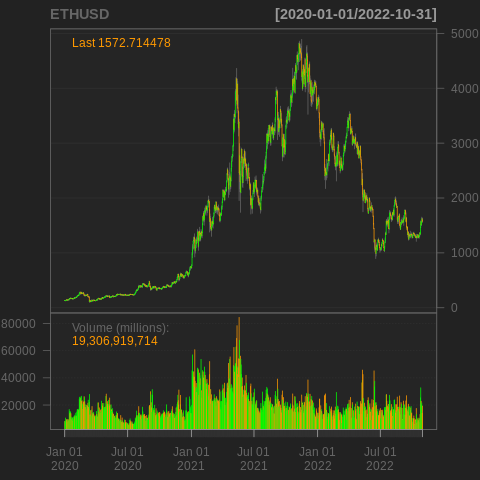

In [ ]:
%%R
ETHUSD <- getSymbols.yahoo("ETH-USD", from = starting_date, to = final_date, auto.assign = F)[,]
ETHAdjust <- ETHUSD[,6]
chartSeries(ETHUSD)

###Basic Attention Token

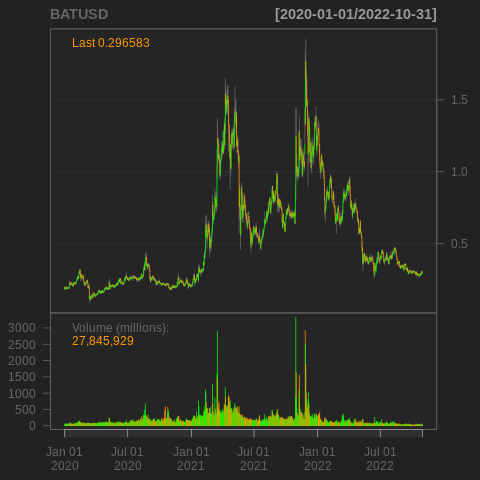

In [ ]:
%%R
BATUSD <- getSymbols.yahoo("BAT-USD", from = starting_date, to = final_date, auto.assign = F)[,]
BATAdjust <- BATUSD[,6]
chartSeries(BATUSD)

###Exploration of Bitcoin vs Ethereum
<p align="justify">
As we could see in the previous images, Bitcoin and Ethereum have similarities in the behavior of
their value. The most notorious are the months of February, October, and September. To explore
this similarities we should look at different indexes.
</p>

Let us start by taking a close look to the adjustment, below we find the plot of the adjustment,
on top is the Bitcoin and Ethereum is below.

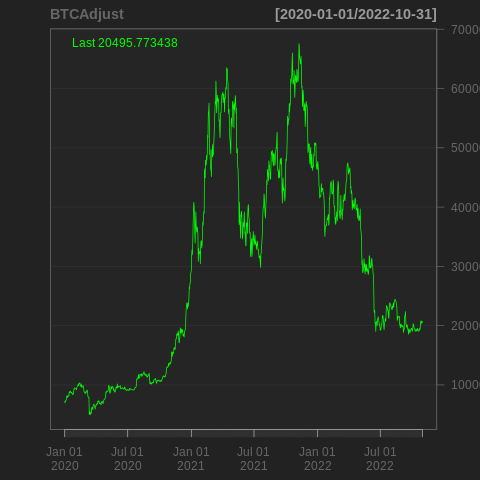

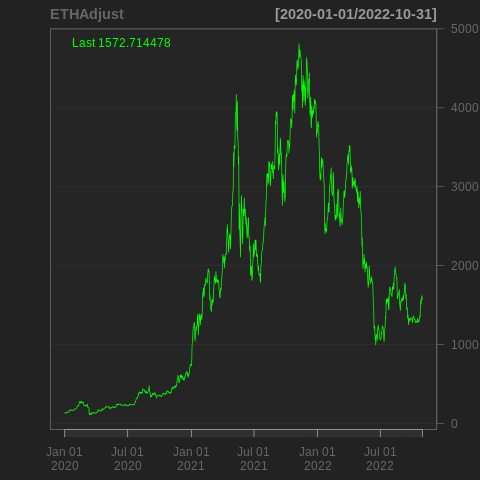

In [ ]:
%%R
chartSeries(BTCAdjust)
chartSeries(ETHAdjust)

Now lets take a look to the Moving Convergence Divergence (MACD), on top we can find the
plot of Bitcoin and below is the Ethereum one.

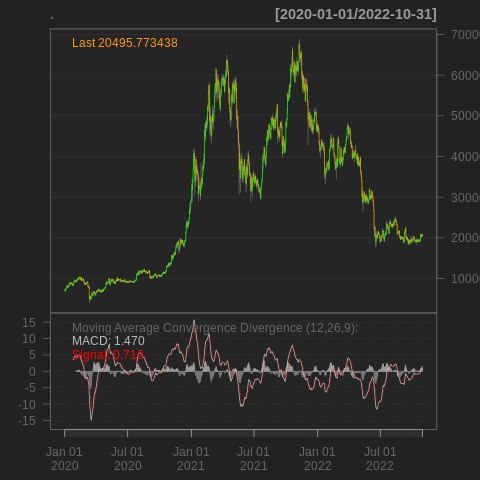

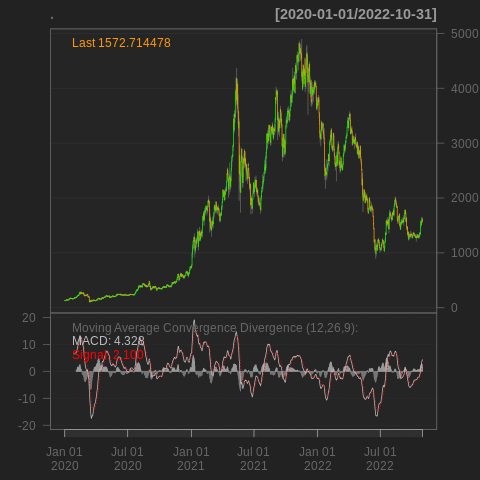

In [ ]:
%%R
`BTCUSD` %>% chartSeries(TA = "addMACD()")
`ETHUSD` %>% chartSeries(TA = "addMACD()")

Now lets take a look to the Relative Strength Index (RSI), on top we can find the plot of Bitcoin
and below is the Ethereum one.

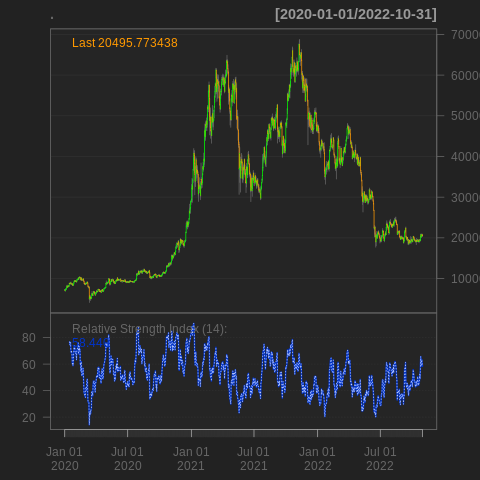

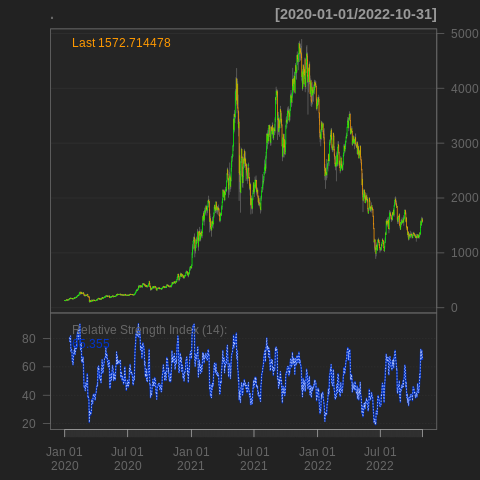

In [ ]:
%%R
`BTCUSD` %>% chartSeries(TA = "addRSI()")
`ETHUSD` %>% chartSeries(TA = "addRSI()")


Now lets take a look to the Average True Range (ATR), on top we can find the plot of Bitcoin
and below is the Ethereum one.

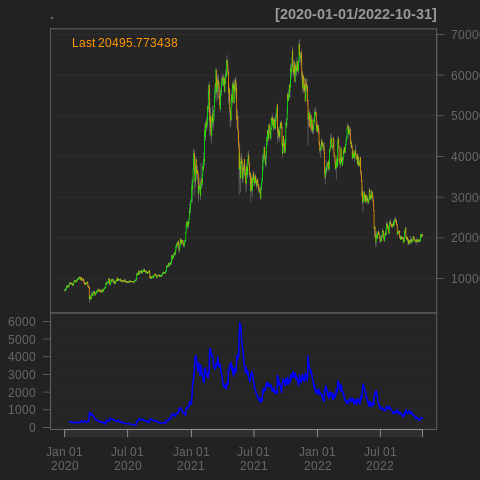

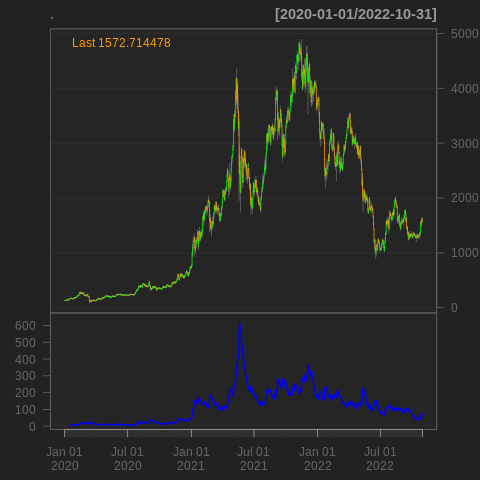

In [ ]:
%%R
`BTCUSD` %>% chartSeries(TA = "addATR()")
`ETHUSD` %>% chartSeries(TA = "addATR()")

To get a better overview of the possible correlation between the value of these two assets, we
should plot the variation of adjustment of both in the same graphic with respect of the date.

In [ ]:
%%R
tickersEB <- c("ETH-USD", "BTC-USD")
portfolioPricesEB <- NULL
for (ticker in tickersEB){
  portfolioPricesEB <- cbind(portfolioPricesEB, 
                           getSymbols.yahoo(ticker,
                                                      from = starting_date, 
                                                      to = final_date,
                                                      periodicity = "daily",
                                                      auto.assign = F)[,6])
  
}

In [ ]:
%%R
portfolioPricesEB <- as.data.frame(portfolioPricesEB)
portfolioPricesEB <- rownames_to_column(portfolioPricesEB, var = "Date")
dfEB_for_plot <- portfolioPricesEB %>%
  gather(key = "Ticker", value = "Price", -Date)
dfEB_for_plot <- na.omit(dfEB_for_plot)

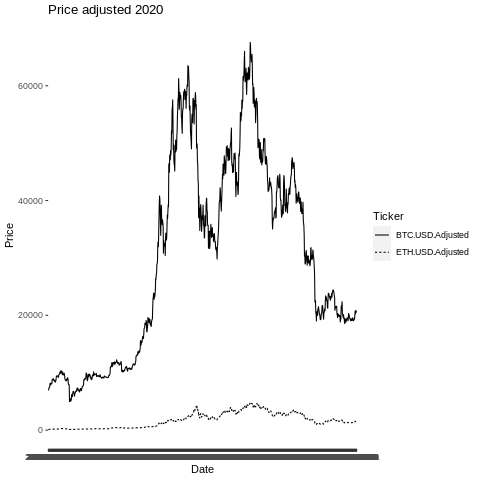

In [ ]:
%%R
ggplot(dfEB_for_plot, aes(x = Date, y = Price))+
  geom_line(aes(group = Ticker, linetype = Ticker))+
  theme(panel.background =  element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  labs(title = "Price adjusted 2020")

<p align="justify">
In principle, from the previous graphic we could conclude that our initial conjecture was mistaken. In the previous graphic we can see huge variations on the value of Bitcoin and very small
variations on the value of Ethereum. But the previous graphic was done with the data with no
processing, therefore the high value of the Bitcoin could be the reason why we see very small
changes on the value of Ethereum in the graphic and no correlation between the two currencies.
</p>
<p align="justify">
To take away the noise made by the high value of Bitcoin, we must normalize the value of both
currencies before we plot both values in the same graphic.
</p>

In [ ]:
%%R
ETHNorm <- na.omit(portfolioPricesEB)[2]/max(na.omit(portfolioPricesEB)[2])
BTCNorm <- na.omit(portfolioPricesEB)[3]/max(na.omit(portfolioPricesEB)[3])
NormEB = data.frame(ETHNorm,BTCNorm)

In [ ]:
%%R
NormEB <- rownames_to_column(NormEB, var = "Date")
dfEx_for_plot <- NormEB %>%
  gather(key = "Ticker", value = "Price", -Date)
dfEx_for_plot <- na.omit(dfEx_for_plot)

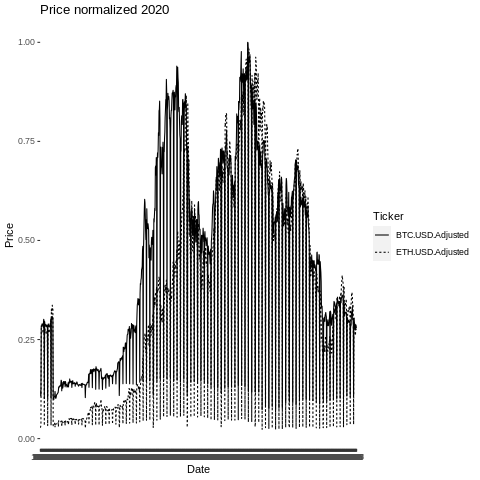

In [ ]:
%%R
ggplot(dfEx_for_plot, aes(x = Date, y = Price))+
  geom_line(aes(group = Ticker, linetype = Ticker))+
  theme(panel.background =  element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  labs(title = "Price normalized 2020")

<p align="justify">
After normalizing both values, we see that both graphics overlap in most of the changes when
the value drops (or increase) "drastically", as we can see from the graphic above. 
</p>
<p align="justify">
Finally we plot the value of Ethereum as a dependence variable of the value of Bitcoin. With
this, we try to understand the value of Ethereum as a direct result of the value of Bitcoin. This
graphic will give us a better idea of their correlation, it worth to mention that the date is not taken
into account for this plot. Therefore, we don’t see the evolution of the values but the possible
relation between them.
</p>

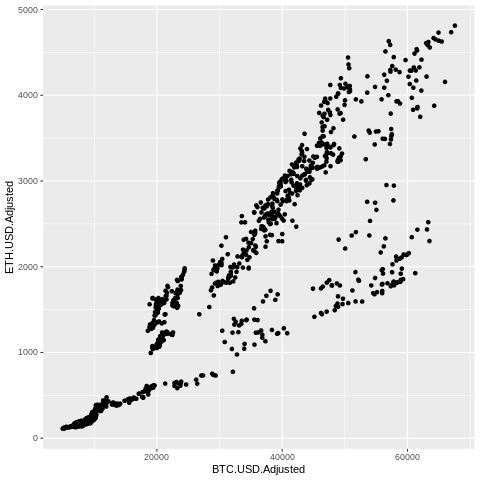

In [ ]:
%%R
dataEB <- na.omit(portfolioPricesEB)
ggplot(dataEB, aes(x = BTC.USD.Adjusted, y = ETH.USD.Adjusted)) + geom_point()

As we can see in the previous graphic, the relation we have been observing resembles a line.

`geom_smooth()` using formula = 'y ~ x'


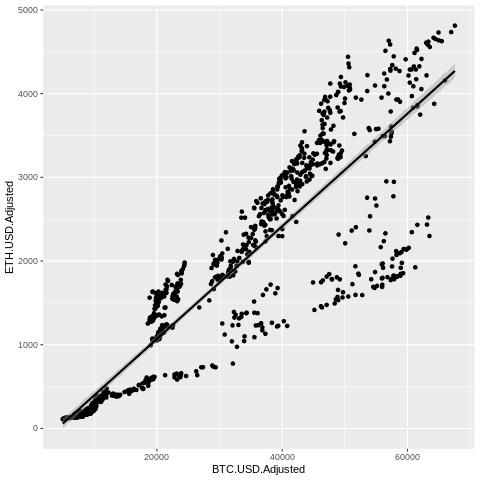

In [ ]:
%%R
ggplot(dataEB, aes(x = BTC.USD.Adjusted, y = ETH.USD.Adjusted)) + geom_point() +  geom_smooth(method = "lm", se = TRUE, color = 'black')

###Exploration of Ethereum vs Basic Attention Token
<p align="justify">
As we could see in the previous images, Ethereum and the Basic Attention Token have no many
similarities in the behavior of their value. We can also see that the months of February and October
show some similarity. To explore whether there is or not a possible correlation, we should look at
different indexes.
</p>

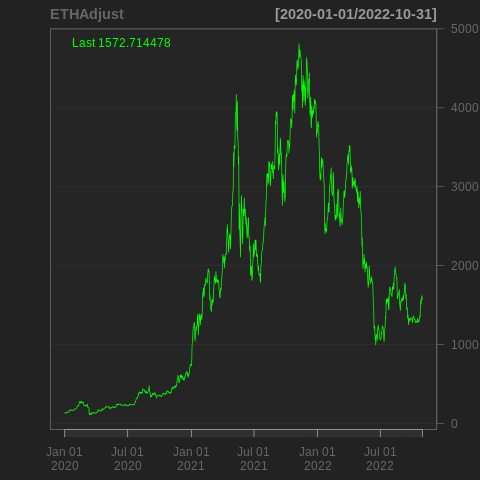

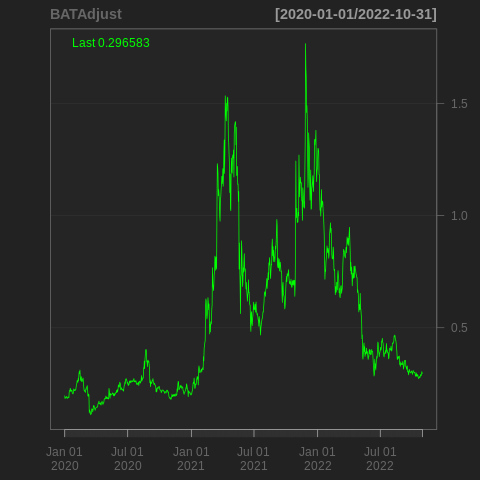

In [ ]:
%%R
chartSeries(ETHAdjust)
chartSeries(BATAdjust)

Now lets take a look to the Moving Convergence Divergence (MACD), on top we can find the
plot of Ethereum and below is the Basic Attention Token one.

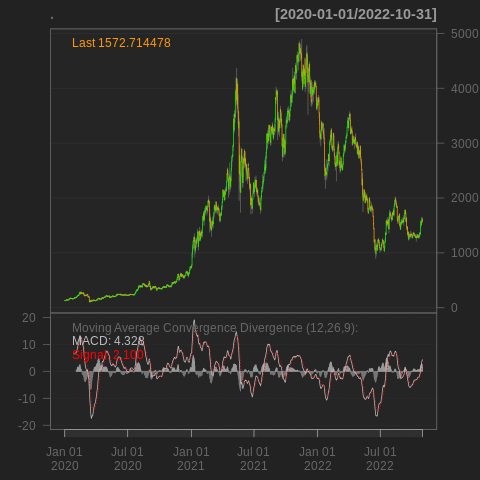

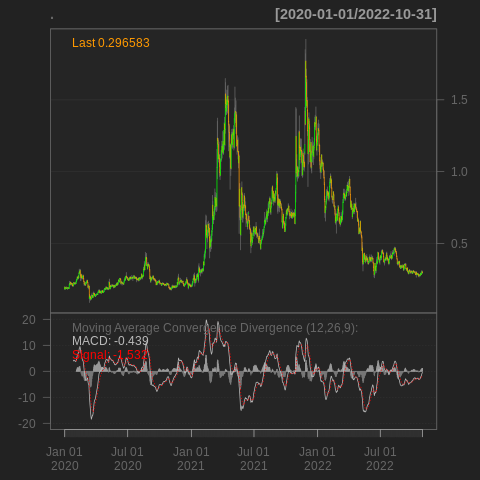

In [ ]:
%%R
`ETHUSD` %>% chartSeries(TA = "addMACD()")
`BATUSD` %>% chartSeries(TA = "addMACD()")

Now lets take a look to the Relative Strength Index (RSI), on top we can find the plot of
Ethereum and below is the Basic Attention Token one.

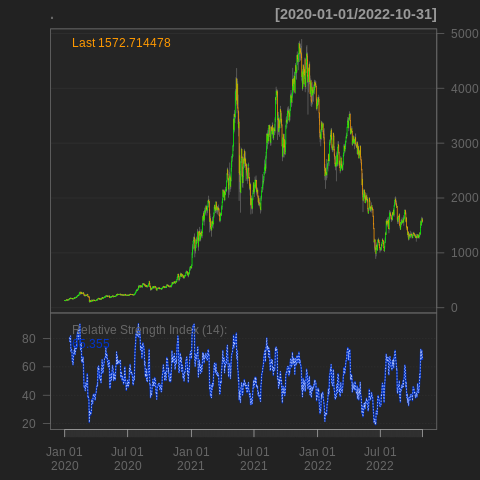

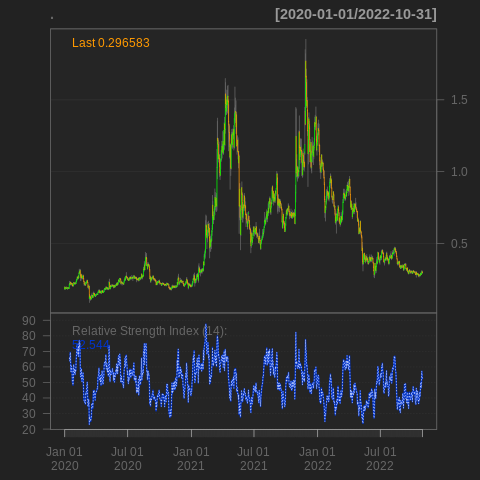

In [ ]:
%%R
`ETHUSD` %>% chartSeries(TA = "addRSI()")
`BATUSD` %>% chartSeries(TA = "addRSI()")

Now lets take a look to the Average True Range (ATR), on top we can find the plot of Ethereum
and below is the Basic Attention Token one.

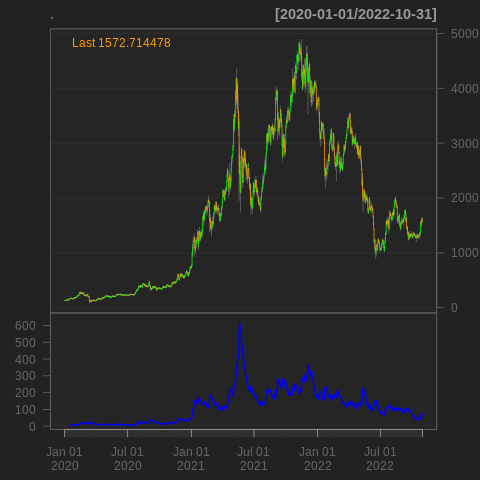

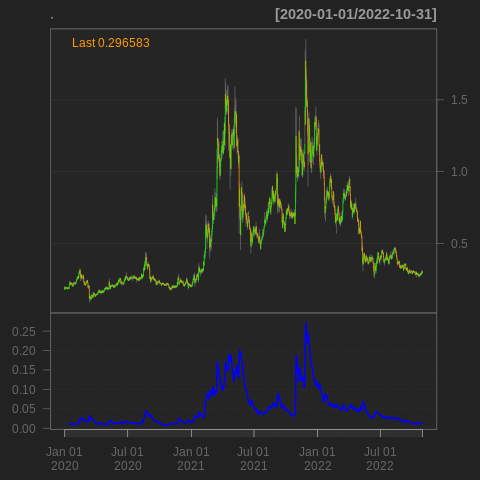

In [ ]:
%%R
`ETHUSD` %>% chartSeries(TA = "addATR()")
`BATUSD` %>% chartSeries(TA = "addATR()")

In the previous graphic we can see that besides February and October, we cannot see more
similarities. We should plot the variation of adjustment of both assets in the same graphic with
respect of the date, in order to corroborate that there is no correlation.

In [ ]:
%%R
tickersEBAT <- c("BAT-USD", "ETH-USD")
portfolioPricesEBAT <- NULL
for (ticker in tickersEBAT){
  portfolioPricesEBAT <- cbind(portfolioPricesEBAT, 
                           getSymbols.yahoo(ticker,
                                                      from = starting_date, 
                                                      to = final_date,
                                                      periodicity = "daily",
                                                      auto.assign = F)[,6])
}

In [ ]:
%%R
portfolioPricesEBAT <- as.data.frame(portfolioPricesEBAT)
portfolioPricesEBAT <- rownames_to_column(portfolioPricesEBAT, var = "Date")
dfEBAT_for_plot <- portfolioPricesEBAT %>%
  gather(key = "Ticker", value = "Price", -Date)
dfEBAT_for_plot <- na.omit(dfEBAT_for_plot)

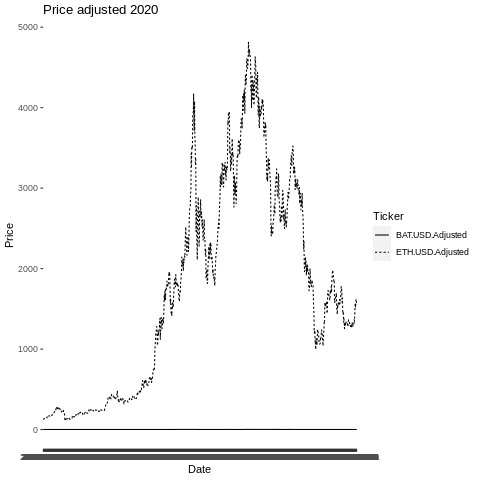

In [ ]:
%%R
ggplot(dfEBAT_for_plot, aes(x = Date, y = Price))+
  geom_line(aes(group = Ticker, linetype = Ticker))+
  theme(panel.background =  element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  labs(title = "Price adjusted 2020")

<p align="justify">
In principle, from the previous graphic we could conclude that our initial conjecture is true.
In the previous graphic we can see huge variations on the value of Ethereum and no variations
on the value of the Basic Attention Token. But the previous graphic was done with the data
with no processing, therefore the high value of the Ethereum could be the reason why we see no
changes on the value of the Basic Attention Token in the graphic and no correlation between the
two currencies.
</p>
<p align="justify">
To take away the noise made by the high value of Ethereum, we must normalize the value of
both currencies before we plot both values in the same graphic.
</p>

In [ ]:
%%R
BATNorm <- na.omit(portfolioPricesEBAT)[2]/max(na.omit(portfolioPricesEBAT)[2])
ETHNorm <- na.omit(portfolioPricesEBAT)[3]/max(na.omit(portfolioPricesEBAT)[3])
NormEBAT = data.frame(BATNorm,ETHNorm)

In [ ]:
%%R
NormEBAT <- rownames_to_column(NormEBAT, var = "Date")
dfEn_for_plot <- NormEBAT %>%
  gather(key = "Ticker", value = "Price", -Date)
dfEn_for_plot <- na.omit(dfEn_for_plot)

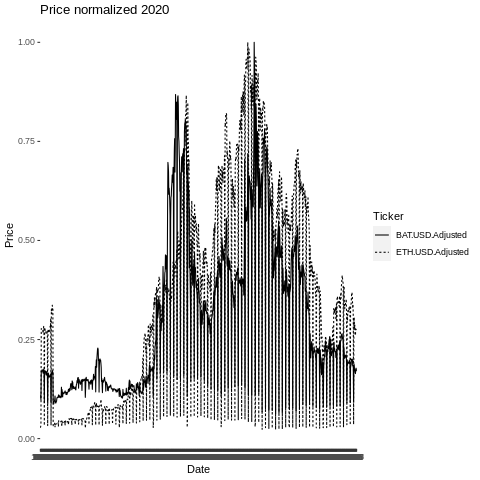

In [ ]:
%%R
ggplot(dfEn_for_plot, aes(x = Date, y = Price))+
  geom_line(aes(group = Ticker, linetype = Ticker))+
  theme(panel.background =  element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  labs(title = "Price normalized 2020")

<p align="justify">
After normalizing both values, we see that both graphics overlap very rarely.
</p>
<p align="justify">
Finally we plot the value of the Basic Attention Token as a dependence variable of the value
of Ethereum. With this, we will see that our conjecture was correct and there is not a strong
correlation. It worth to mention that the date is not taken into account for this plot. Therefore, we
don’t see the evolution of the values but the possible relation between them.
</p>

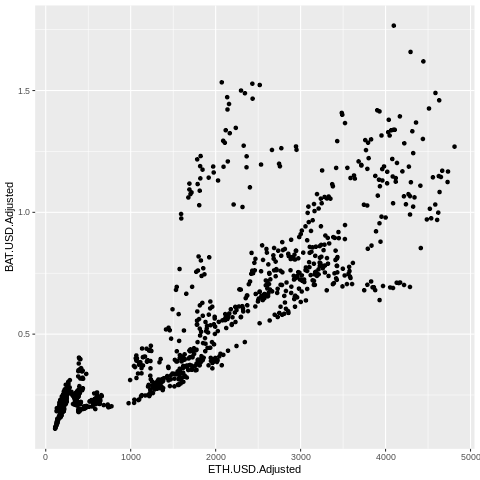

In [ ]:
%%R
dataEBAT <- na.omit(portfolioPricesEBAT)
ggplot(dataEBAT, aes(x = ETH.USD.Adjusted, y = BAT.USD.Adjusted)) + geom_point()

##The correlation between Bitcoin vs Ethereum
<p align="justify">
In the previous section we explore the data of Bitcoin and Ethereum and found that their value
might be related via a linear function. In this section we will explore more the conjecture that the
value of these two assets are related linearly. The first step will be to test the correlation between
the two variables.
</p>

In [ ]:
%%R
cor.test(dataEB[,3], dataEB[,2])


	Pearson's product-moment correlation

data:  dataEB[, 3] and dataEB[, 2]
t = 64.931, df = 1033, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8835312 0.9075868
sample estimates:
      cor 
0.8962158 



<p align="justify">
As we can see that the p-value is very low. Therefore we should do a linear regression to build
a model and test the model with new data, this in order to understand if the behavior exposed by
Bitcoin and Ethereum during 2020 was a singularity of that time interval, or if the value of both
assets are linearly related in general via the market cap and traders.
</p>


### Building and testing the model
<p align="justify">
Even though we could build the model with all the data of 2020 and test it with the data of 2021,
we will divide the data in a training set and test set for good practices and to not build a "perfect
model" that is not good to make predictions.   
</p>

In [ ]:
%%R
split = sample.split(dataEB$ETH.USD.Adjusted, SplitRatio = 0.8)
training_set = subset(dataEB, split == TRUE)
test_set = subset(dataEB, split == FALSE)

In [ ]:
%%R
regressor = lm(formula = ETH.USD.Adjusted ~ BTC.USD.Adjusted, 
               data = training_set)

Now that we have build the model, we can plot the test set of 2020 (the points in red) against
the prediction of our model (the blue line). We can also compare our model with our initial
overview of the correlation.

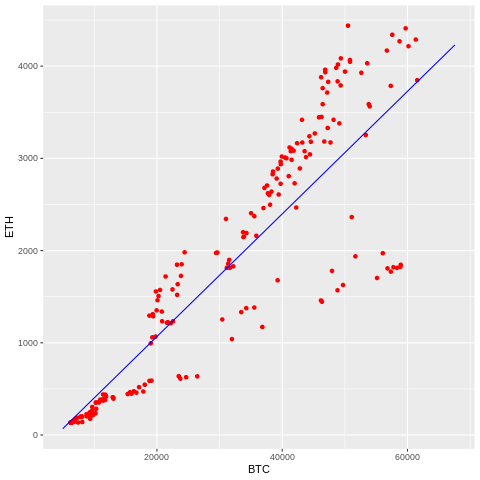

In [ ]:
%%R
ggplot() +
  geom_point(aes(x = test_set$BTC.USD.Adjusted, y = test_set$ETH.USD.Adjusted), 
             colour = 'red') +
  geom_line(aes(x = training_set$BTC.USD.Adjusted, y = predict(regressor, newdata = training_set)),
            colour = 'blue') +
  xlab('BTC') +
  ylab('ETH')

`geom_smooth()` using formula = 'y ~ x'


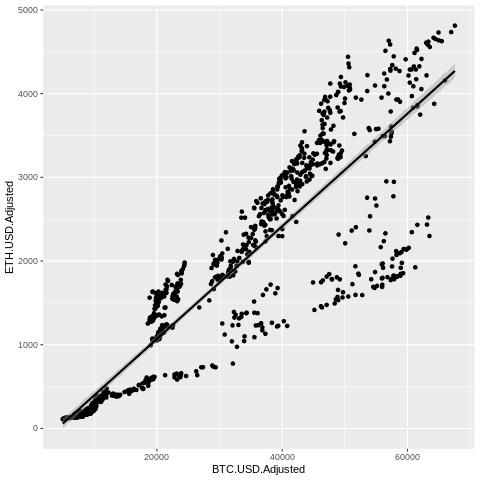

In [ ]:
%%R
ggplot(dataEB, aes(x = BTC.USD.Adjusted, y = ETH.USD.Adjusted)) + geom_point() +  geom_smooth(method = "lm", se = TRUE, color = 'black')

###Predicting new data (January 2021)
<p align="justify">
Now that we have build our model and seen that it fits with our initial conjecture, we can proceed to test the model with the data of January 2021. With this test we can conclude whether the
correlation observed in 2020 trend to continue during 2021, or if the recent moves in the market
has modify this relation. We will start by downloading the data and showing the Japanese Candlesticks before we apply our model, this should gives us an initial intuition about how well our
model behaves with the new data.
</p>

In [ ]:
%%R
starting_prediction_date <- "2021-1-1"
final_prediction_date <- "2021-1-31"

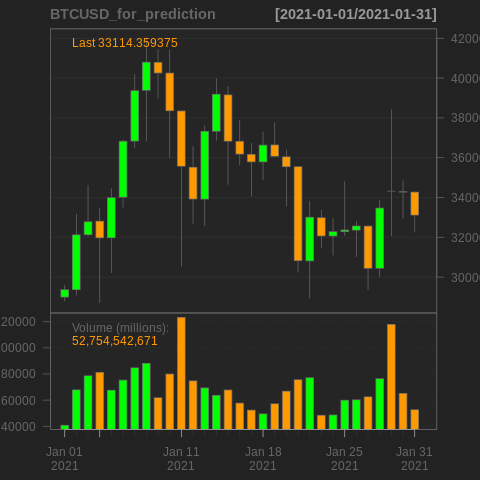

In [ ]:
%%R
BTCUSD_for_prediction <- getSymbols.yahoo("BTC-USD", from = starting_prediction_date, to = final_prediction_date, auto.assign = F)[,]
BTCAdjust_for_prediction <- BTCUSD_for_prediction[,6]
chartSeries(BTCUSD_for_prediction)

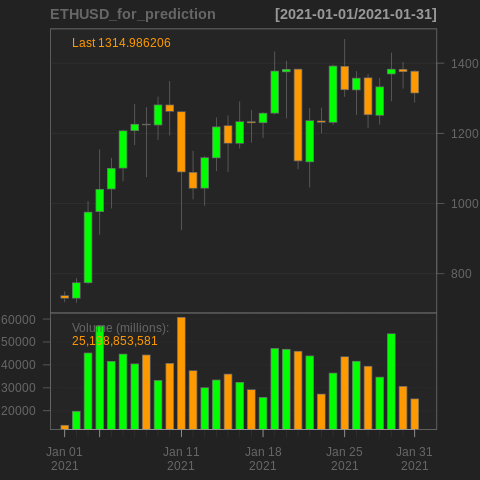

In [ ]:
%%R
ETHUSD_for_prediction <- getSymbols.yahoo("ETH-USD", from = starting_prediction_date, to = final_prediction_date, auto.assign = F)[,]
ETHAdjust_for_prediction <- ETHUSD_for_prediction[,6]
chartSeries(ETHUSD_for_prediction)

<p align="justify">
From the two previous graphics we could conclude that the relation between both assets during 2021 will not follow the trend of 2020. We can observe that Bitcoin has lost a lot of value in the
last two thirds of January, meanwhile Ethereum has had a constant growing trend during January.
Even though it lost a lot of value during some days, Ethereum recovers the value very quick. 
</p>
<p>
Let us prepare the data and test our model with the new data, being the data point the red
ones and the model prediction the blue line.
</p>

In [ ]:
%%R
EB_for_prediction <- NULL
for (ticker in tickersEB){
  EB_for_prediction <- cbind(EB_for_prediction, 
                           getSymbols.yahoo(ticker,
                                                      from = starting_prediction_date, 
                                                      to = final_prediction_date,
                                                      periodicity = "daily",
                                                      auto.assign = F)[,6])
  
}

In [ ]:
%%R
ETH_pred = data.frame(EB_for_prediction$BTC.USD.Adjusted, predict(regressor, newdata = EB_for_prediction))
names(ETH_pred)[2] <- "ETH.USD.Adjusted"
ETH_pred<- ETH_pred[, c(2,1)]

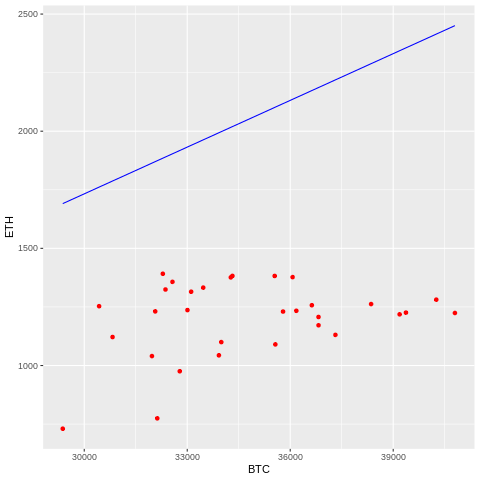

In [ ]:
%%R
ggplot() +
       geom_line(aes(x = ETH_pred$BTC.USD.Adjusted, y = ETH_pred$ETH.USD.Adjusted) , colour = 'blue') +
       geom_point(aes(x = EB_for_prediction$BTC.USD.Adjusted, y = EB_for_prediction$ETH.USD.Adjusted) , colour = 'red') +
       xlab('BTC') +
       ylab('ETH')

<p align="justify">
As we can see in the previous graphic, our model fails to predict the relation between this two
assets observed during 2021.
</p> 


###The big picture
<p align="justify">
Before we make conclusion we have to get the big picture. We know that this is a small set of data
and the error observed in this picture may be less than the error produced when the model was
constructed with the 2020 data.
</p>

In [ ]:
%%R
EB_whole <- NULL
for (ticker in tickersEB){
  EB_whole <- cbind(EB_whole, 
                           getSymbols.yahoo(ticker,
                                                      from = starting_date, 
                                                      to = final_prediction_date,
                                                      periodicity = "daily",
                                                      auto.assign = F)[,6])
  
}

In [ ]:
%%R
ETH_pred_whole = data.frame(EB_whole$BTC.USD.Adjusted, predict(regressor, newdata = EB_whole))
names(ETH_pred_whole)[2] <- "ETH.USD.Adjusted"
ETH_pred_whole<- ETH_pred_whole[, c(2,1)]

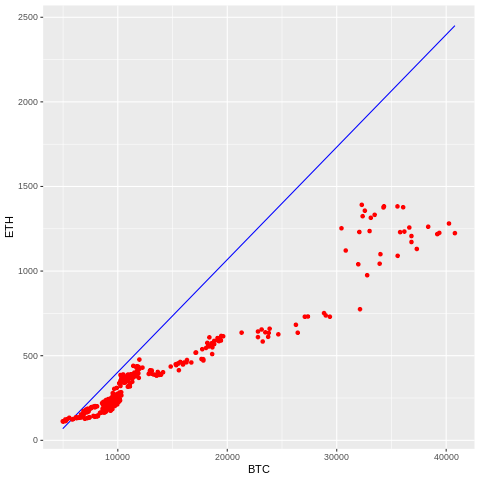

In [ ]:
%%R
ggplot() +
       geom_line(aes(x = ETH_pred_whole$BTC.USD.Adjusted, y = ETH_pred_whole$ETH.USD.Adjusted) , colour = 'blue') +
       geom_point(aes(x = EB_whole$BTC.USD.Adjusted, y = EB_whole$ETH.USD.Adjusted) , colour = 'red') +
       xlab('BTC') +
       ylab('ETH')

<p align="justify">
As we can observe in the previous graphic in which we used the data from 2020 and the one
from January 2021, the linear relation that we observed during 2020 does not hold any longer with
the new data.
</p>

###The volume
<p align="justify">
Let us finish the section by taking a look to the volume of of Bitcoin and Ethereum. We have seen
that during 2020 the value of both assets were related, now the question is whether the volume
are also related.
</p>

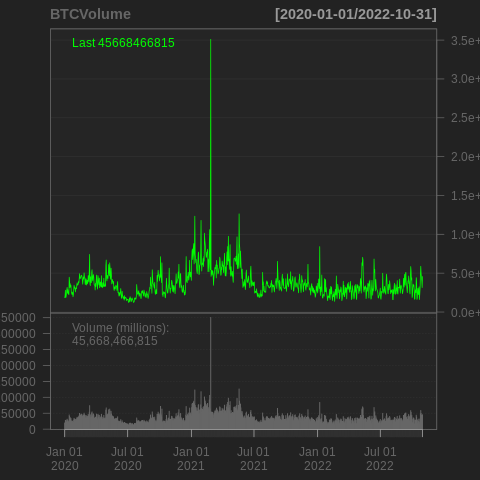

In [ ]:
%%R
BTCVolume <- BTCUSD[,5]
chartSeries(BTCVolume)

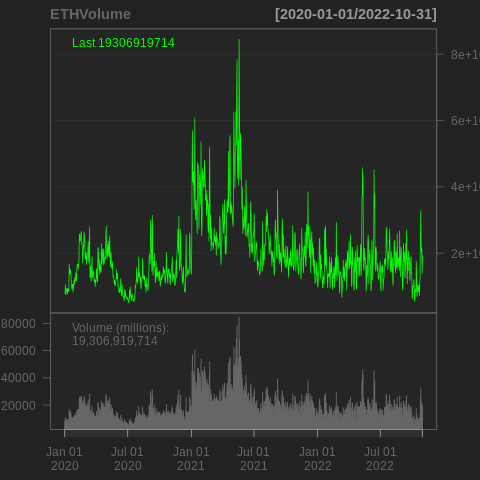

In [ ]:
%%R
ETHVolume <- ETHUSD[,5]
chartSeries(ETHVolume)

<p align="justify">
We can see in the graphics above that the volumes look very similar
</p>

In [ ]:
%%R
EB_Volume <- NULL
for (ticker in tickersEB){
  EB_Volume <- cbind(EB_Volume, 
                           getSymbols.yahoo(ticker,
                                                      from = starting_date, 
                                                      to = final_date,
                                                      periodicity = "daily",
                                                      auto.assign = F)[,5])
  
}

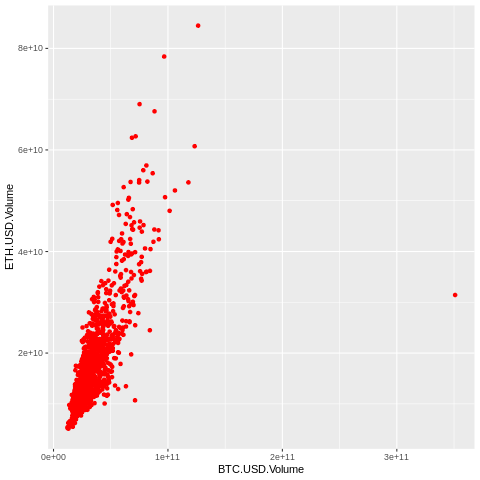

In [ ]:
%%R
EB_Volume <- na.omit(EB_Volume)
ggplot(EB_Volume, aes(x = BTC.USD.Volume, y = ETH.USD.Volume)) + geom_point(colour = 'red')

<p align="justify">
From the previous picture we can conclude that the volumes are related but the trend is not
clearly linear as in the case of the values.
</p>

##The correlation between Ethereum and the Basic Attention Token
<p align="justify">
As we saw in the third section, the value of Ethereum and the value of the Basic Attention Token
have no correlation. In this section we will take a look to the volume of these two assets, this
would give us an overview of the popularity of both assets. 
</p>

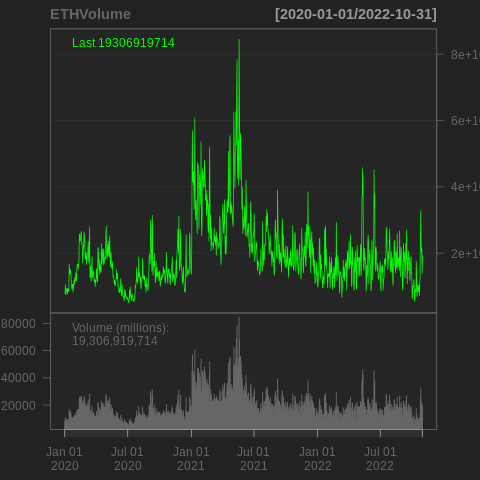

In [ ]:
%%R
ETHVolume <- ETHUSD[,5]
chartSeries(ETHVolume)

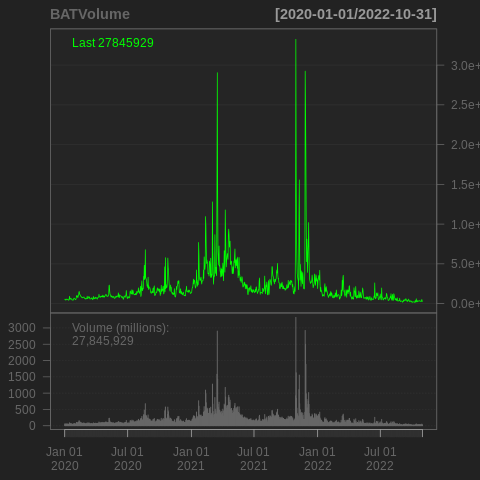

In [ ]:
%%R
BATVolume <- BATUSD[,5]
chartSeries(BATVolume)

<p align="justify">
From the previous images it is not clear if there is a correlation between these two volumes,
in the first part of 2020 the volumes are clearly not correlated, but in the second part the volumes
look similar. To get a better understanding we should plot the volume of the Basic Attention Token
as a dependent variable of the volume of Ethereum.
</p>

In [ ]:
%%R
EBAT_Volume <- NULL
for (ticker in tickersEBAT){
  EBAT_Volume <- cbind(EBAT_Volume, 
                           getSymbols.yahoo(ticker,
                                                      from = starting_date, 
                                                      to = final_date,
                                                      periodicity = "daily",
                                                      auto.assign = F)[,5])
  
}

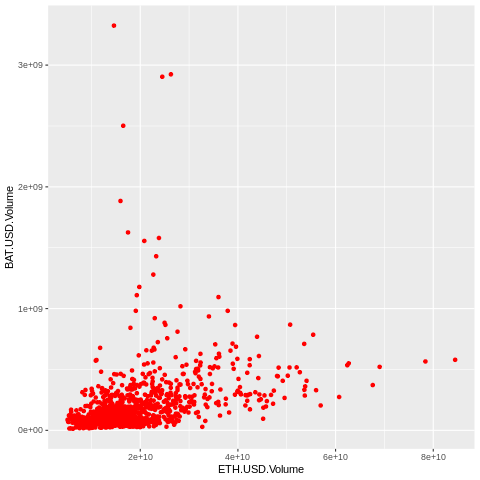

In [ ]:
%%R
EBAT_Volume <- na.omit(EBAT_Volume)
ggplot(EBAT_Volume, aes(x = ETH.USD.Volume, y = BAT.USD.Volume)) + geom_point(colour = 'red')

<p align="justify">
From the last image we can see that an increase in the volume of Ethereum does not implies
an increase on the value of the Basic Attention Token, this makes us think that these two assets are
not related in value and neither in volume.
</p>

##Conclusions
<p align="justify">
After making this short study we can conclude that there is a relation between Bitcoin and
Ethereum, but it looks that this relation is going to change during 2021. This could be due to
many reasons and it deserves further studies. In contrast of the simple idea that a token based
on the Ethereum blockchain would have a tight relation to Ethereum, we have found that this is
not necessarily true. We have show that the Basic Attention Token and Ethereum don’t have a
tight relation neither in value nor in volume. Clearly these are not the only cryptoassets, there
are many other such as Binance coin, Lite coin, etc. This short study can be made with any other
cryptoassets to understand whether their are related via the market cap.
</p>

<p align="justify">
Finally, there is not a general correlation between any two cryptoassets, we showed two cases
in which the assets are correlated and another one in which the assets are not.
</p>


<b>Author information</b> 

Miguel Moreno

Github: Miguelwan

webpage: miguelmath.com

email: contact@miguelmath.com


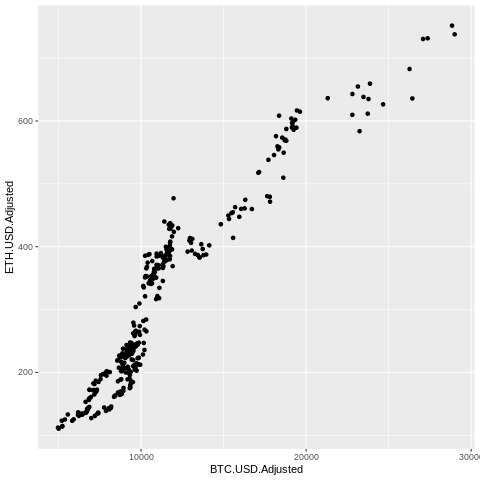

In [ ]:
%%R
starting_date <- "2020-1-1"
final_date <- "2020-12-31"
tickersEB <- c("ETH-USD", "BTC-USD")
portfolioPricesEB <- NULL
for (ticker in tickersEB){
  portfolioPricesEB <- cbind(portfolioPricesEB, 
                           getSymbols.yahoo(ticker,
                                                      from = starting_date, 
                                                      to = final_date,
                                                      periodicity = "daily",
                                                      auto.assign = F)[,6])
  
}
portfolioPricesEB <- as.data.frame(portfolioPricesEB)
portfolioPricesEB <- rownames_to_column(portfolioPricesEB, var = "Date")
dataEB <- na.omit(portfolioPricesEB)
ggplot(dataEB, aes(x = BTC.USD.Adjusted, y = ETH.USD.Adjusted)) + geom_point()

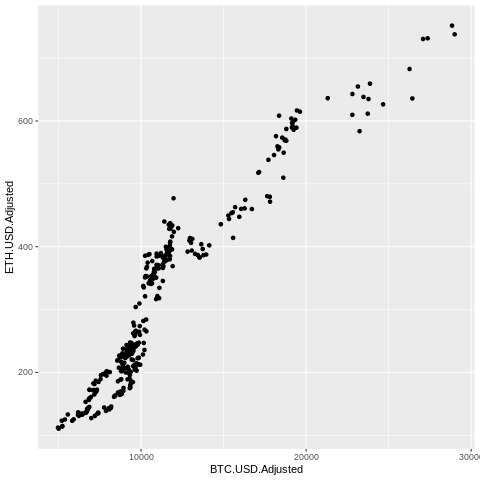

In [ ]:
%%R
starting_date <- "2020-1-1"
final_date <- "2020-12-31"
tickersEB <- c("ETH-USD", "BTC-USD")
portfolioPricesEB <- NULL
for (ticker in tickersEB){
  portfolioPricesEB <- cbind(portfolioPricesEB, 
                           getSymbols.yahoo(ticker,
                                                      from = starting_date, 
                                                      to = final_date,
                                                      periodicity = "daily",
                                                      auto.assign = F)[,6])
  
}
portfolioPricesEB <- as.data.frame(portfolioPricesEB)
portfolioPricesEB <- rownames_to_column(portfolioPricesEB, var = "Date")
dataEB <- na.omit(portfolioPricesEB)
ggplot(dataEB, aes(x = BTC.USD.Adjusted, y = ETH.USD.Adjusted)) + geom_point()

## Python

In [27]:
%%R
write.csv(BTCUSD,"/content//BTC.csv", row.names = index(BTCUSD))